Ref principal: https://github.com/eduonix/nlptextclassification/blob/master/NLP%20for%20Text%20Classification%20(Jupyter%20Notebook).ipynb

##Basics

In [0]:
import re
import nltk
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Carrega Planilha

In [0]:
#df = pd.read_excel(r'/content/drive/My Drive/Chamados.xlsx') 
#df = pd.read_excel(r'/content/drive/My Drive/Trabalho PLN/Chamados/Chamados.xlsx')
df = pd.read_excel(r'/content/drive/My Drive/IMD/2019-2020/PLN - Aranha/Trabalho PLN/Chamados/Chamados.xlsx')
#display(df.info())
df.head()

,Classificação,Assunto,Descricao
0,Inc - Con,PROBLEMA DE CONECTIVIDADE,PROBLEMA DE CONECTIVIDADE
1,Inc - Con,PC SEM INTERNET,raquel do bag de dr renato informou que está c...
2,Inc - Con,PC SEM INTERNET,"vanessa , gab dr carlos barros informou proble..."
3,Inc - Con,COMPUTADOR SEM ACESSO A INTERNET,Usuário informa que o computador está sem aces...
4,Inc - Con,COMPUTADOR NÃO ESTÁ LOGANDO,COMPUTADOR NÃO ESTÁ LOGANDO.


In [0]:
# distribuição das classes
classes = df['Classificação'].astype('str')

descricoes = df['Descricao'].astype('str')

print(classes.value_counts())

Req - Equ    1194
Req - Sis     962
nan           407
Inc - Sis     284
Inc - Equ     170
Outros         71
Inc - Con      55
Req - Con      52
Name: Classificação, dtype: int64


### Preprocessa dados

In [0]:
#classes = classes[~classes.isin(['nan', 'Inc - Sis', 'Inc - Equ', 'Outros', 'Inc - Con', 'Req - Con'])]
classes = classes[~classes.isin(['nan'])]
print("Chamados:", classes.count())
classes.value_counts()

Chamados: 2788


Req - Equ    1194
Req - Sis     962
Inc - Sis     284
Inc - Equ     170
Outros         71
Inc - Con      55
Req - Con      52
Name: Classificação, dtype: int64

In [0]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_classes = encoder.fit_transform(classes)


In [0]:
print(encoded_classes[20])
print(classes[20])

print('-----------------------')
print(encoded_classes[58])
print(classes[58])
print('-----------------------')
print(encoded_classes[250])
print(classes[250])

print('-----------------------')
print(encoded_classes[600])
print(classes[600])
print('-----------------------')
print(encoded_classes[700])
print(classes[700])

print('-----------------------')
print(encoded_classes[1800])
print(classes[1800])

print('-----------------------')
print(encoded_classes[2787])
classes[2787]



0
Inc - Con
-----------------------
1
Inc - Equ
-----------------------
2
Inc - Sis
-----------------------
4
Req - Con
-----------------------
5
Req - Equ
-----------------------
5
Req - Equ
-----------------------
6


'Req - Sis'

In [0]:
# tags html
processed = descricoes.str.replace(r'<[^>]*>', '') #<[^>]*> <.*?>

# email 
processed = processed.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'email')

# URLs 
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'link')

# cifrões de dinheiro 
processed = processed.str.replace(r'£|\$', 'cifrao')
    
# numero telefone
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'telefone')
    
# numeros em geral
processed = processed.str.replace(r'\d+(\.\d+)?', 'numero')

# pontuação
processed = processed.str.replace(r'[^\w\d\s]', '')

# dois espaços  ou mais
processed = processed.str.replace(r'\s+', ' ')

processed = processed.str.replace(r'^\s+|\s+?$', ' ')

# minusculo
processed = processed.str.lower()


In [0]:
pip install ftfy

     |████████████████████████████████| 61kB 4.1MB/s 
  Created wheel for ftfy: filename=ftfy-5.6-cp36-none-any.whl size=44553 sha256=4250722c5693ac6de0aff76310932054c032bf16b3e7fc9b52fb9633759f4a3d
  Stored in directory: /root/.cache/pip/wheels/43/34/ce/cbb38d71543c408de56f3c5e26ce8ba495a0fa5a28eaaf1046
Successfully built ftfy


In [0]:
import ftfy 

descricoes = [ftfy.fix_text(descricao) for descricao in processed.values]

descricoes

ModuleNotFoundError: ignored

In [0]:
'''
Stopwords

'''
nltk.download('stopwords')

pt_stopwords = set(nltk.corpus.stopwords.words("portuguese"))

processed = map(lambda x: ' '.join(term for term in x.split() if term not in pt_stopwords), descricoes)

processed = list(processed)

processed

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['problema conectividade',
 'raquel bag dr renato informou dificuldades escutar radio plenario gostaria saber q fazer informado usuária area restrita passando instabilidade',
 'vanessa gab dr carlos barros informou problemas acesso internet informado usuária area restrita passando instabilidade serviço restaurado necessário fechar abrir navegador sistema retornasse normal',
 'usuário informa computador acesso internet',
 'computador logando',
 'usuário informa acesso internet',
 'conectividade',
 'problema conectividade',
 'acesso internet resolvido',
 'usuário informa internet',
 'problema conectividade',
 'usuário informa computador acesso rede',
 'problema conectividade',
 'usuário informa acesso internet',
 'bom dia conseguindo acessar site tce rn',
 'usuário consegue conectar wifi',
 'problema conectividade',
 'usuário consegue navegar rede',
 'computador acesso internet',
 'computador acesso internet',
 'problema conectividade',
 'problema conectividade',
 'usuária solicita apoio

In [0]:
'''
Steeming

'''
nltk.download('rslp')

stemmer = nltk.stem.RSLPStemmer()

processed = list(map(lambda x: ' '.join(stemmer.stem(term) for term in x.split()), processed))

processed 

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


['problem conect',
 'raquel bag dr renat inform dificuldad escut radi plenari gost sab q faz inform usuár are restrit pass instabil',
 'vaness gab dr carl barr inform problem acess internet inform usuár are restrit pass instabil serviç restaur necess fech abr naveg sistem retorn norm',
 'usu inform comput acess internet',
 'comput log',
 'usu inform acess internet',
 'conect',
 'problem conect',
 'acess internet resolv',
 'usu inform internet',
 'problem conect',
 'usu inform comput acess red',
 'problem conect',
 'usu inform acess internet',
 'bom dia consegu acess sit tce rn',
 'usu conseg conect wif',
 'problem conect',
 'usu conseg naveg red',
 'comput acess internet',
 'comput acess internet',
 'problem conect',
 'problem conect',
 'usuár solicit apoi verific comput red',
 'solicit bloquei email malici cheg caix postal instituc dest tribun',
 'problem conect',
 'problem conect',
 'problem conect',
 'problem conect',
 'problem conect wif tce estaçã',
 'comput internet',
 'comput in

### Obter características

In [0]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

all_words = []

for message in processed:
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

print('Total de palavras: {}'.format(len(all_words)))
print('Mais comuns: {}'.format(all_words.most_common(5)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Total de palavras: 3671
Mais comuns: [('numer', 1237), ('solicit', 685), ('process', 653), ('configur', 448), ('inform', 422)]


In [0]:
#numero de features
word_features = list(all_words.keys())[:1500]

In [0]:
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)

    return features

In [0]:
features = find_features(processed[0])
for key, value in features.items():
    if value == True:
        print(key)

problem
conect


In [0]:
chamados = list(zip(processed, encoded_classes))

seed = 1
np.random.seed = seed
np.random.shuffle(chamados)

featuresets = [(find_features(text), label) for (text, label) in chamados]

In [0]:
featuresets[0]

({'problem': False,
  'conect': False,
  'raquel': False,
  'bag': False,
  'dr': False,
  'renat': False,
  'inform': True,
  'dificuldad': False,
  'escut': False,
  'radi': False,
  'plenari': False,
  'gost': False,
  'sab': False,
  'q': False,
  'faz': False,
  'usuár': False,
  'are': False,
  'restrit': False,
  'pass': False,
  'instabil': False,
  'vaness': False,
  'gab': False,
  'carl': False,
  'barr': False,
  'acess': False,
  'internet': False,
  'serviç': False,
  'restaur': False,
  'necess': False,
  'fech': False,
  'abr': False,
  'naveg': False,
  'sistem': False,
  'retorn': False,
  'norm': False,
  'usu': False,
  'comput': False,
  'log': False,
  'resolv': False,
  'red': False,
  'bom': False,
  'dia': False,
  'consegu': False,
  'sit': False,
  'tce': False,
  'rn': False,
  'conseg': False,
  'wif': False,
  'solicit': False,
  'apoi': False,
  'verific': True,
  'bloquei': False,
  'email': False,
  'malici': False,
  'cheg': False,
  'caix': False,
  '

In [0]:
from sklearn import model_selection

training, testing = model_selection.train_test_split(featuresets, test_size = 0.25, random_state=seed)

print("Treino:", len(training))
print("Teste:", len(testing))

Treino: 2091
Teste: 697


### Classificadores

In [0]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC

model = SklearnClassifier(SVC(kernel = 'linear'))

# train the model on the training data
model.train(training)

# and test on the testing dataset!
accuracy = nltk.classify.accuracy(model, testing)*100
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 76.61406025824964


In [0]:
from sklearn.metrics import confusion_matrix

txt_features, labels = zip(*testing)

prediction = model.classify_many(txt_features)


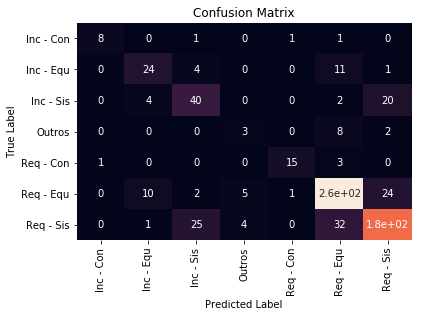

In [0]:
axes = ['Inc - Con', 'Inc - Equ', 'Inc - Sis', 'Outros', 'Req - Con', 'Req - Equ', 'Req - Sis']


sns.heatmap(confusion_matrix(labels, prediction), annot=True, cbar=False,  xticklabels= axes, yticklabels=axes)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()